<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


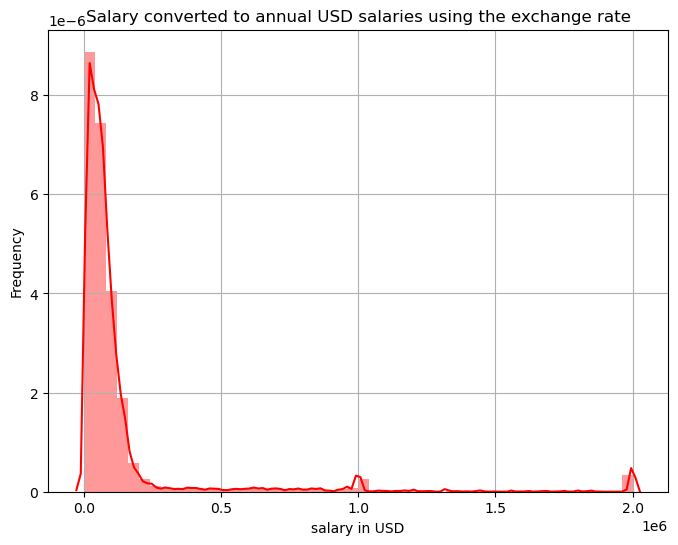

In [3]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

distribution_curve= df['ConvertedComp']
distribution_curve= distribution_curve.dropna()

plt.figure (figsize=(8,6))
sns.distplot(distribution_curve, color= 'red')

plt.title ('Salary converted to annual USD salaries using the exchange rate')
plt.xlabel('salary in USD')
plt.ylabel ('Frequency')
plt.grid (True)

plt.show()

Plot the histogram for the column `ConvertedComp`.


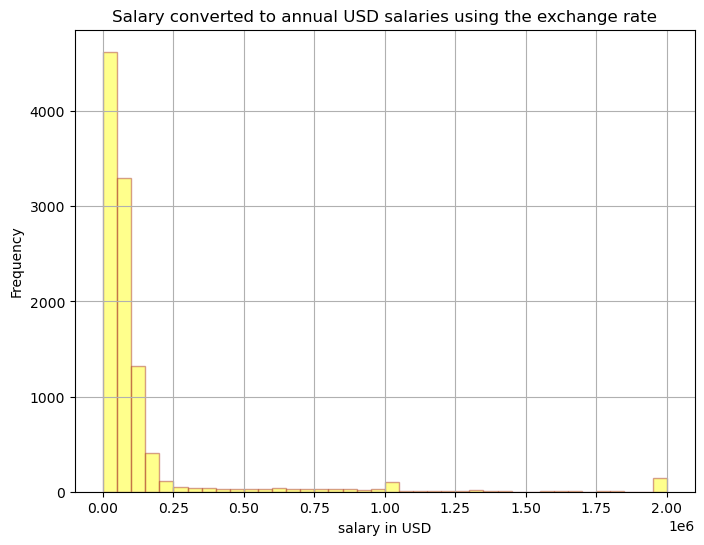

In [5]:
# your code goes here
plt.figure(figsize=(8,6))
plt.hist(distribution_curve, bins=40, alpha= 0.45, color= 'yellow', edgecolor= 'brown')

plt.title ('Salary converted to annual USD salaries using the exchange rate')
plt.xlabel('salary in USD')
plt.ylabel ('Frequency')
plt.grid (True)

plt.show()

What is the median of the column `ConvertedComp`?


In [4]:
# your code goes here
median_ConvertedComp= df['ConvertedComp'].median()
print ('The Median of ConvertedComp is:', median_ConvertedComp)

The Median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
Men_responders= df[df['Gender'] =='Man']
Count_Men_responders= Men_responders.shape[0]
print ('The responders that  identified as Man are:', Count_Men_responders)

The responders that  identified as Man are: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
Women_responders= df[df['Gender']== "Woman"]
Count_Women_responders= Women_responders.shape[0]
print ('The responders that  identified as Woman are:', Count_Women_responders)
Median_Women_responders= Women_responders['ConvertedComp'].median()
print ('The median ConvertedComp of responders identified themselves only as a Woman are:', Median_Women_responders)

The responders that  identified as Woman are: 731
The median ConvertedComp of responders identified themselves only as a Woman are: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
df_age= df['Age']

minimum_age= df_age.min()
print ('minimum age is:', minimum_age)
first_quartile_age = df_age.quantile (0.25)
print ('first_quartile_age is:', first_quartile_age)
median_age = df_age. median()
print ('median_age is:', median_age)
third_quartile =df_age.quantile (0.75)
print ('third_quartile is:', third_quartile)
maximum_age =df_age. max()
print ('maximum_age is:', maximum_age)


minimum age is: 16.0
first_quartile_age is: 25.0
median_age is: 29.0
third_quartile is: 35.0
maximum_age is: 99.0


Plot a histogram of the column `Age`.


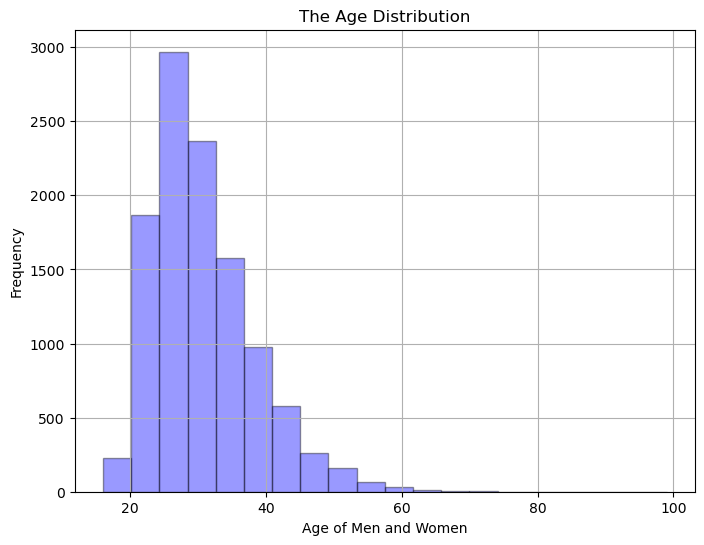

In [9]:
# your code goes here
plt.figure (figsize= (8,6))
plt.hist (df_age, bins= 20, alpha= 0.40, color= 'blue', edgecolor= 'black')

plt.title ('The Age Distribution')
plt.xlabel ('Age of Men and Women')
plt.ylabel ('Frequency')

plt.grid (True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


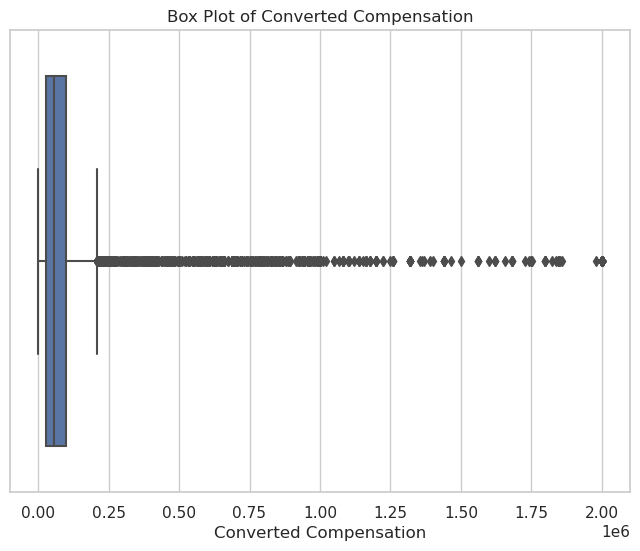

In [15]:
# your code goes here
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['ConvertedComp'])

plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with a column 'ConvertedComp'
# Calculate the quartiles
Q1 = np.percentile(df['ConvertedComp'], 25)
Q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the IQR
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")




The Interquartile Range (IQR) for ConvertedComp is: nan


Find out the upper and lower bounds.


In [19]:
# your code goes here
Q1 = np.percentile(df['ConvertedComp'], 25)
Q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the IQR
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for potential outliers: {lower_bound}")
print(f"Upper Bound for potential outliers: {upper_bound}")

Lower Bound for potential outliers: nan
Upper Bound for potential outliers: nan


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in the ConvertedComp column: {num_outliers}")

Number of outliers in the ConvertedComp column: 0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [31]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with a column 'ConvertedComp'
# Calculate the quartiles
Q1 = np.percentile(df['ConvertedComp'], 25)
Q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound and upper bound for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of the 'ConvertedComp' column in the filtered DataFrame
median_converted_comp = filtered_df['ConvertedComp'].median()

mean_converted_comp = filtered_df['ConvertedComp'].mean()

print("Outliers are removed.")
print(f"Median of 'ConvertedComp' after removing outliers: {median_converted_comp}")
print(f"Mean of 'ConvertedComp' after removing outliers: {mean_converted_comp}")

Outliers are removed.
Median of 'ConvertedComp' after removing outliers: nan
Mean of 'ConvertedComp' after removing outliers: nan


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
correlational= df.corr()['Age']
print ('correlation between Age is:',correlational)

correlation between Age is: Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
